# Final Project Part 1 - Proposal 1: Credit Default Prediction

### The target variable you want to predict

The target variable that I want to predict is if the customer will default next month. 

### How predicting that target variable could help with some kind of decision

Predicting this variable will help the bank determine whether or not to provide a credit line increase or potentially a credit line decrease to customers to either maximize revenue or minimize loss. My assumption is if the customer is paying consistently every month, the probability of defaulting in the next payment is very unlikely. 

### The features you want to use to predict that target variable

o	The features used to predict this variable from the data are: 
- Amount of given credit 
- Gender
- Education
- Marital Status
- Age 
- History of Repayment Status from April – September 2015 (each month is a separate column)
- Amount of bill statement from April – September 2015
- Amount of previous payment from April – September 2015


### Goals and success metrics

The goal is to be able to predict if the customer is going to default the next month (October 2015). 

### Risks or limitations

The main limitation is there is only data from April – September 2015 and may not be sufficient enough to predict if the customer is going to default. Using only 6 months of data to predict if a customer is going to default is limited because the entire life cycle of the card could provide better insights. 

In [43]:
import pandas as pd
credit_card_default = pd.read_csv('./data/credit_card_default.csv')
credit_card_default.head()
credit_card_default = credit_card_default.set_index('ID')
credit_card_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
credit_card_default.shape

#22,500 rows and 24 columns

(22500, 24)

In [45]:
credit_card_default.isnull().sum()

#no missing data 
#data is cleaned up but there are missing data 

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [46]:
#Education had 5,6,0 and changed it to 4 
credit_card_default.loc[:,'EDUCATION'].value_counts()
credit_card_default.loc[:,'EDUCATION'] = credit_card_default.loc[:, 'EDUCATION'].replace({5: 4, 6: 4, 0: 4})

In [47]:
#Marriage had 0 so changing it to 3 for 'others'
credit_card_default.loc[:,'MARRIAGE'].value_counts()
credit_card_default.loc[:,'MARRIAGE'] = credit_card_default.loc[:, 'MARRIAGE'].replace({0: 3})
credit_card_default.loc[:,'MARRIAGE'].value_counts()

2    12219
1     9990
3      291
Name: MARRIAGE, dtype: int64

In [48]:
credit_card_default.loc[credit_card_default.loc[:,'AGE'] <= 0,:]
#no accounts with age less than or equal to 0 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,


In [49]:
credit_card_default.loc[:,'default payment next month'].value_counts(normalize=True)

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

# Final Project Part 2 - Exploratory Data Analysis

Variable descriptions: This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
- X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005; . . .;
- X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:
- -1 = pay duly;
- 1 = payment delay for one month;
- 2 = payment delay for two months; . . .;
- 8 = payment delay for eight months;
- 9 = payment delay for nine months and above.
- -2 = indicates no consumption in the month, and a value of
- 0 = indicates the use of revolving credit (equivalent to prepayment)
- X12-X17: Amount of bill statement (NT dollar).
- X12 = amount of bill statement in September, 2005;
- X13 = amount of bill statement in August, 2005; . . .;
- X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar).
- X18 = amount paid in September, 2005;
- X19 = amount paid in August, 2005; . . .;
- X23 = amount paid in April, 2005.

# Build a first-pass model on your data:

- Load in your data set.
- Separate your target column from potential feature columns.
- Get those columns in a clean enough state that you can build a model with them. It is OK to be fast and loose at this stage, e.g. by simply dropping rows or columns that have missing values or have string values that would take some work to make usable.
- Do a train/test split.
- Fit some kind of regression or classification model on your training set. Be sure to choose the correct type: regression if your target variable is a number, classification if it is a category.
- Use an appropriate metric to evaluate your model on both the training set and the test set. Be sure to choose a regression metric for a regression problem (e.g. MSE, RMSE, MAE, R-squared) or a classification metric for a classification problem (e.g. accuracy, $F_1$).
- Compare your model's performance to that of a null model, e.g. by calculating R^2 for a regression model, comparing accuracy for a classification model to the frequency of the most common class, or calculating the same metric for your model and for a set of predictions that is simply the average value of the target variable for a regression model or the most common class for a classification model.
- State whether this first-pass model appears to be overfitting or underfitting.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import metrics

plt.style.use('fivethirtyeight')
%matplotlib inline

$\blacksquare$ Feature Engineering

In [52]:
#Credit_Utilization_Rate = Your Total Debt / Your Total Avaliable Credit
#https://www.experian.com/blogs/ask-experian/credit-education/score-basics/credit-utilization-rate/

credit_card_default['Credit_Util_Rate_1'] = (credit_card_default['BILL_AMT1'] - credit_card_default['PAY_AMT1'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_2'] = (credit_card_default['BILL_AMT2'] - credit_card_default['PAY_AMT2'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_3'] = (credit_card_default['BILL_AMT3'] - credit_card_default['PAY_AMT3'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_4'] = (credit_card_default['BILL_AMT4'] - credit_card_default['PAY_AMT4'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_5'] = (credit_card_default['BILL_AMT5'] - credit_card_default['PAY_AMT5'])/credit_card_default['LIMIT_BAL']
credit_card_default['Credit_Util_Rate_6'] = (credit_card_default['BILL_AMT6'] - credit_card_default['PAY_AMT6'])/credit_card_default['LIMIT_BAL']

credit_card_default['Credit_Util_Avg'] = (credit_card_default['Credit_Util_Rate_1'] +
                                        credit_card_default['Credit_Util_Rate_2'] +
                                        credit_card_default['Credit_Util_Rate_3'] +
                                        credit_card_default['Credit_Util_Rate_4'] +
                                        credit_card_default['Credit_Util_Rate_5'] +
                                        credit_card_default['Credit_Util_Rate_6'])/6                         

In [11]:
#Adding the repayment status to the calcuation. 
#If <0 which is good, >0 is bad
credit_card_default['Credit_Pay_Status_Avg'] = (credit_card_default['PAY_0'] +
                                        credit_card_default['PAY_2'] +
                                        credit_card_default['PAY_3'] +
                                        credit_card_default['PAY_4'] +
                                        credit_card_default['PAY_5'] +
                                        credit_card_default['PAY_6'])/6

credit_card_default['Credit_Util_Pay_Status_Avg'] = (credit_card_default['Credit_Util_Avg'] * credit_card_default['Credit_Pay_Status_Avg'])

In [53]:
credit_card_default.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Credit_Util_Rate_1',
       'Credit_Util_Rate_2', 'Credit_Util_Rate_3', 'Credit_Util_Rate_4',
       'Credit_Util_Rate_5', 'Credit_Util_Rate_6', 'Credit_Util_Avg'],
      dtype='object')

In [14]:
#calculate R^2 through cross validation

# Explore your data, looking for insights that might help you improve your model.

In [54]:
credit_card_default.dtypes

LIMIT_BAL                       int64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default payment next month      int64
Credit_Util_Rate_1            float64
Credit_Util_Rate_2            float64
Credit_Util_

In [14]:
credit_card_default.describe()
#Describe does not apply to 'ID', SEX', 'EDUCATION', and 'MARRIAGE'

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,default payment next month,Credit_Util_Rate_1,Credit_Util_Rate_2,Credit_Util_Rate_3,Credit_Util_Rate_4,Credit_Util_Rate_5,Credit_Util_Rate_6,Credit_Util_Avg,Credit_Pay_Status_Avg,Credit_Util_Pay_Status_Avg
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,163424.608000,1.610178,1.831333,1.568933,35.212889,0.015067,-0.106978,-0.137422,-0.197333,-0.237067,...,0.226133,0.383564,0.371962,0.358169,0.323337,0.302965,0.287063,0.337843,-0.154467,0.137721
std,128515.245979,0.487721,0.734407,0.520698,9.307266,1.119824,1.197125,1.202637,1.164344,1.137459,...,0.418336,0.415597,0.412199,0.395713,0.373015,0.355392,0.354784,0.341167,0.980098,0.431845
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,-2.664750,-3.404694,-2.882782,-3.086000,-2.530600,-3.013530,-0.746872,-2.000000,-2.219445
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.005234,0.002642,0.002531,0.001632,0.000000,0.000000,0.005748,-0.833333,-0.000492
50%,135000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.285607,0.271033,0.252927,0.219094,0.190837,0.163778,0.245906,0.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.772794,0.751924,0.707582,0.620643,0.572435,0.553923,0.637818,0.000000,0.015881
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,6.234300,6.198000,5.235400,4.986850,4.928000,3.785550,5.203558,6.000000,9.329604


In [15]:
credit_card_default.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,default payment next month,Credit_Util_Rate_1,Credit_Util_Rate_2,Credit_Util_Rate_3,Credit_Util_Rate_4,Credit_Util_Rate_5,Credit_Util_Rate_6,Credit_Util_Avg,Credit_Pay_Status_Avg,Credit_Util_Pay_Status_Avg
LIMIT_BAL,1.000000,0.016259,-0.247428,-0.108019,0.145016,-0.263680,-0.295251,-0.284323,-0.260785,-0.242676,...,-0.148079,-0.334008,-0.343777,-0.340462,-0.323860,-0.316518,-0.299338,-0.368703,-0.312555,-0.200447
SEX,0.016259,1.000000,0.009012,-0.016432,-0.132641,-0.050606,-0.061151,-0.059282,-0.051407,-0.047535,...,-0.038250,-0.065321,-0.064713,-0.058270,-0.047808,-0.041110,-0.031314,-0.058834,-0.060468,-0.036023
EDUCATION,-0.247428,0.009012,1.000000,-0.132721,0.172016,0.118907,0.140543,0.128700,0.122726,0.109836,...,0.036193,0.178317,0.171201,0.164000,0.148268,0.134107,0.128593,0.174970,0.142041,0.071783
MARRIAGE,-0.108019,-0.016432,-0.132721,1.000000,-0.413992,0.012663,0.018712,0.026555,0.024197,0.029844,...,-0.033205,0.032354,0.031268,0.031675,0.032453,0.031380,0.031581,0.035824,0.027855,-0.009823
AGE,0.145016,-0.132641,0.172016,-0.413992,1.000000,-0.034701,-0.048135,-0.050460,-0.045635,-0.048023,...,0.009450,-0.019427,-0.022323,-0.032010,-0.042561,-0.042324,-0.039321,-0.036546,-0.053015,-0.019474
PAY_0,-0.263680,-0.050606,0.118907,0.012663,-0.034701,1.000000,0.664267,0.562983,0.525229,0.492612,...,0.324702,0.377020,0.376509,0.373832,0.372570,0.370763,0.361819,0.419601,0.730497,0.569197
PAY_2,-0.295251,-0.061151,0.140543,0.018712,-0.048135,0.664267,1.000000,0.762511,0.659204,0.616761,...,0.260688,0.467960,0.455378,0.447395,0.447093,0.441090,0.428726,0.505553,0.847475,0.612282
PAY_3,-0.284323,-0.059282,0.128700,0.026555,-0.050460,0.562983,0.762511,1.000000,0.776793,0.684168,...,0.233688,0.381507,0.459452,0.444999,0.445710,0.437993,0.429060,0.487626,0.877259,0.584156
PAY_4,-0.260785,-0.051407,0.122726,0.024197,-0.045635,0.525229,0.659204,0.776793,1.000000,0.822062,...,0.213800,0.367514,0.396422,0.472331,0.467346,0.460061,0.451444,0.489030,0.891431,0.573847
PAY_5,-0.242676,-0.047535,0.109836,0.029844,-0.048023,0.492612,0.616761,0.684168,0.822062,1.000000,...,0.207287,0.354455,0.380879,0.422448,0.497747,0.484456,0.469580,0.486524,0.875253,0.553075


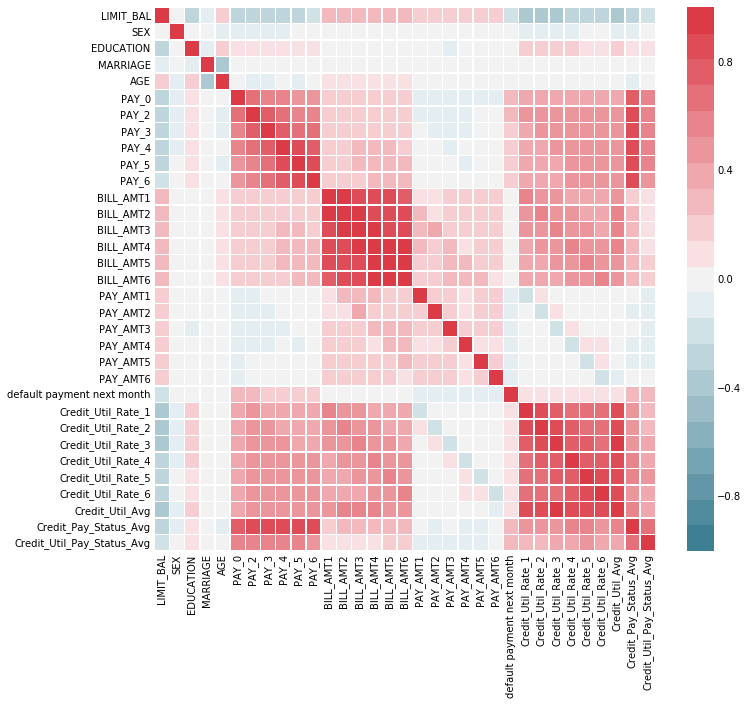

In [10]:
#heatmap to identify correlation. Looks like Repayment Status (Pay_0, Pay_2, etc) have a high correlation with default payment next month 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(credit_card_default.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21),
           linewidths=.5, ax=ax);

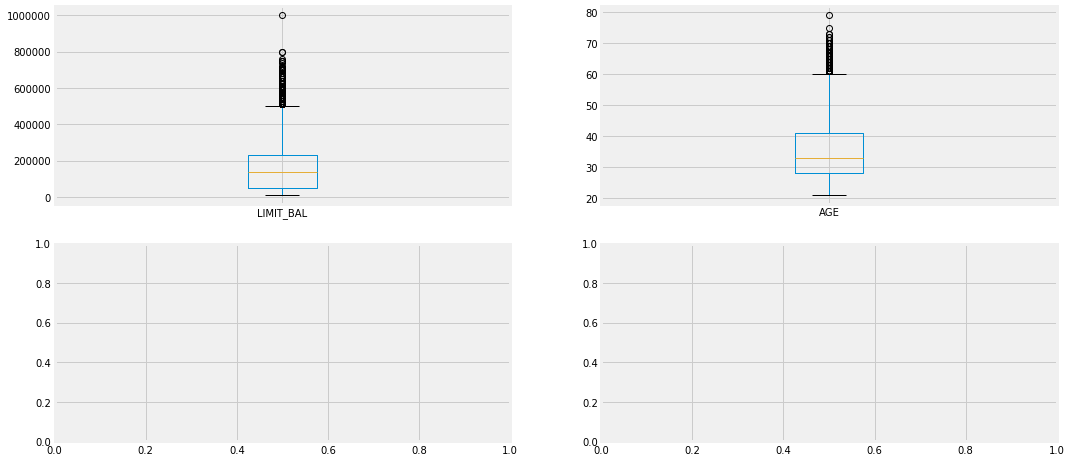

In [16]:
#check for outliers via a boxplot for 'AGE' and 'LIMIT BALANCE'
fig, axes = plt.subplots(2,2, figsize=(16,8))
credit_card_default.loc[:,['LIMIT_BAL']].plot(kind='box', ax=axes[0,0])
credit_card_default.loc[:,['AGE']].plot(kind='box', ax=axes[0,1]);

female    13729
male       8771
Name: SEX, dtype: int64


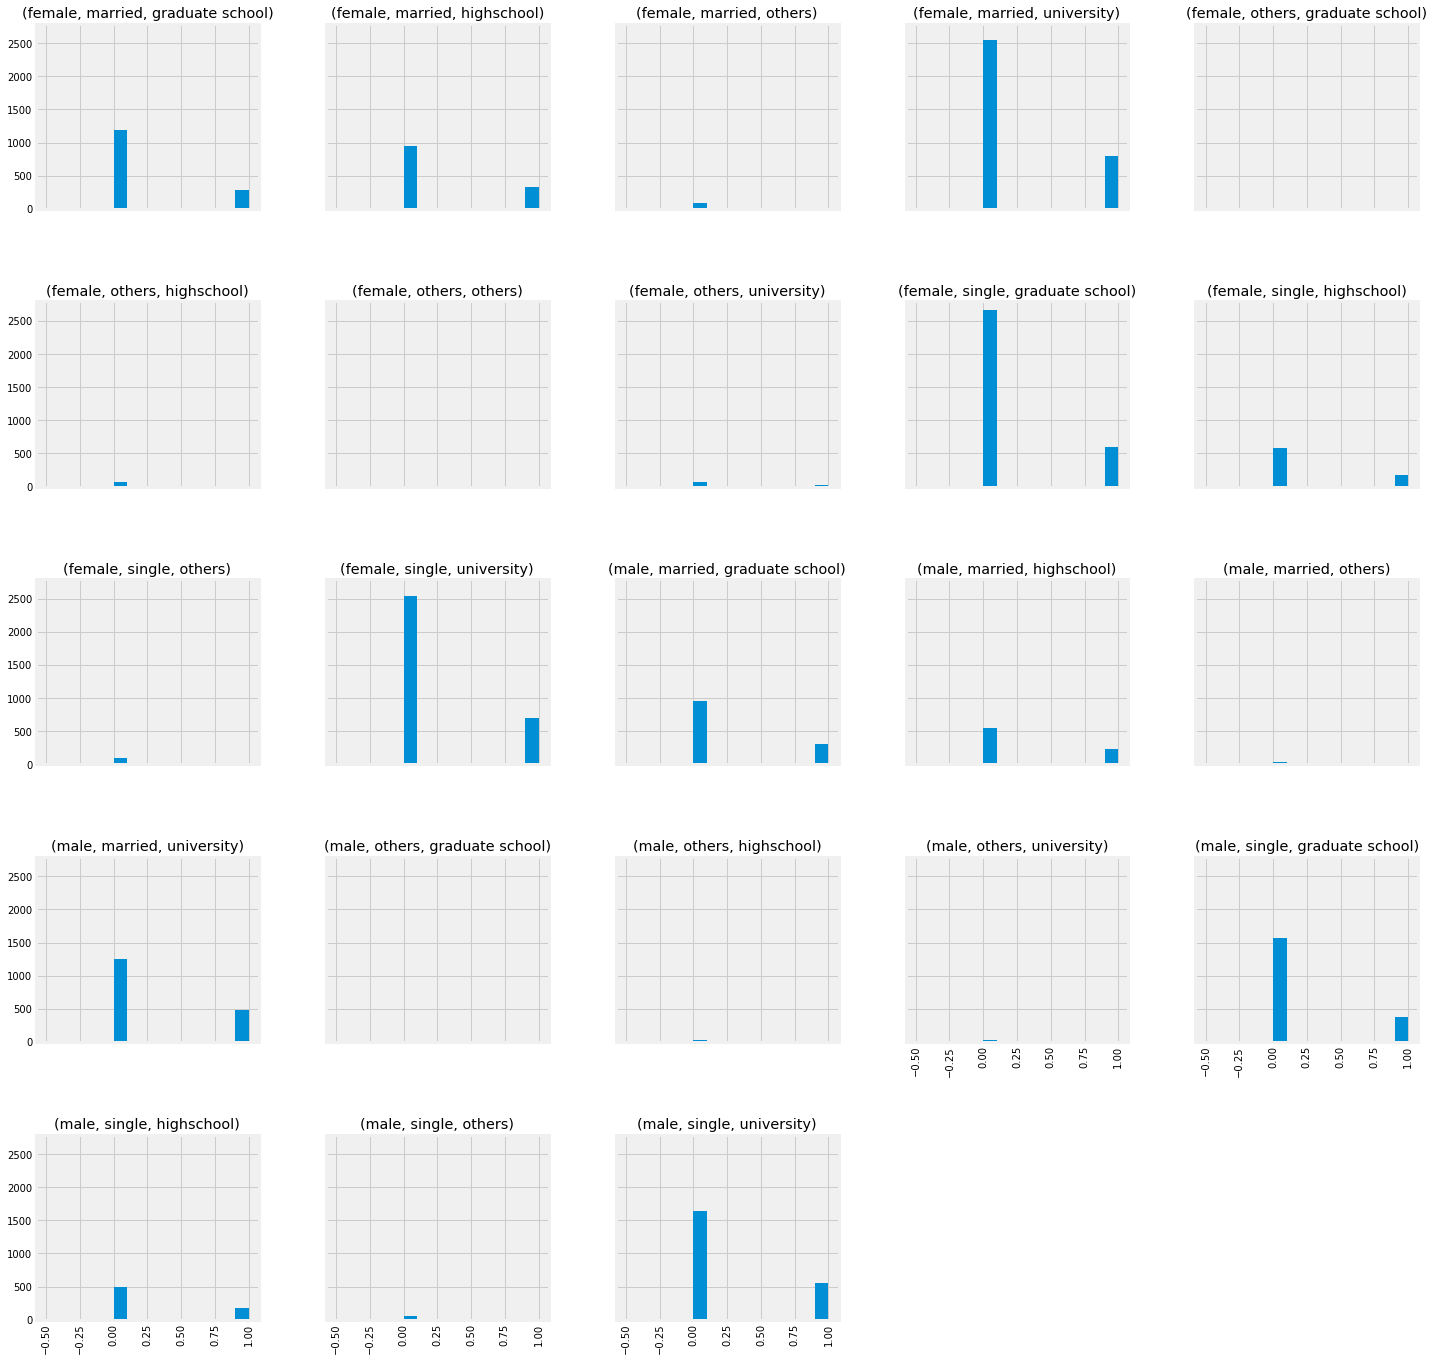

In [20]:
credit_card_default['SEX'] = credit_card_default['SEX'].replace({1:'male', 2:'female'})
credit_card_default['MARRIAGE'] = credit_card_default['MARRIAGE'].replace({1:'married', 2:'single', 3:'others'})
credit_card_default['EDUCATION'] = credit_card_default['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'highschool', 4:'others'})
print(credit_card_default.loc[:,'SEX'].value_counts())
credit_card_default.hist(column='default payment next month', by=['SEX','MARRIAGE', 'EDUCATION'], figsize=(24, 24), sharex=True, sharey=True);

university         10634
graduate school     7982
highschool          3581
others               303
Name: EDUCATION, dtype: int64
Percentage of graduate defaulted: 19.731896767727385
Percentage of high school defaulted: 25.886623848087126
Percentage of others defaulted: 6.6006600660066
Percentage of university defaulted: 24.13014858002633
                                            default payment next month
EDUCATION       default payment next month                            
graduate school 0                                                 6407
                1                                                 1575
highschool      0                                                 2654
                1                                                  927
others          0                                                  283
                1                                                   20
university      0                                                 8068
                1   

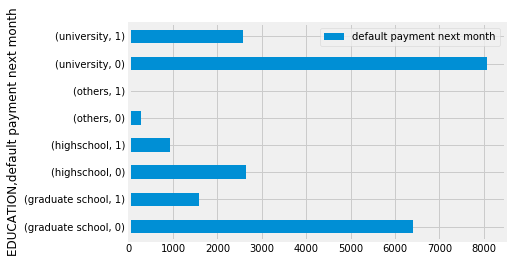

In [21]:
#look at the distribution of 'Education' from the data 
print(credit_card_default.loc[:,'EDUCATION'].value_counts())
print('Percentage of graduate defaulted:', 1575/(7982)*100)
print('Percentage of high school defaulted:', 927/(3581)*100)
print('Percentage of others defaulted:', 20/(303)*100)
print('Percentage of university defaulted:', 2566/(10634)*100)
cd_ed = credit_card_default.groupby(['EDUCATION', 'default payment next month']).agg({'default payment next month':'count'})
print(cd_ed)
cd_ed.plot(kind='barh')

female    13729
male       8771
Name: SEX, dtype: int64
Percentage of female defaulted: 21.334401631582782
Percentage of male defaulted: 24.61520921217649
                                   default payment next month
SEX    default payment next month                            
female 0                                                10800
       1                                                 2929
male   0                                                 6612
       1                                                 2159


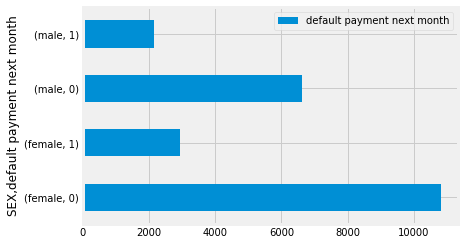

In [22]:
#look at the distribution of 'SEX' from the data
print(credit_card_default.loc[:,'SEX'].value_counts())
print('Percentage of female defaulted:', 2929/(13729)*100)
print('Percentage of male defaulted:', 2159/(8771)*100)
cd_sex = credit_card_default.groupby(['SEX', 'default payment next month']).agg({'default payment next month': 'count'})
print(cd_sex)
cd_sex.plot(kind='barh')

single     12219
married     9990
others       291
Name: MARRIAGE, dtype: int64
Perecentage of married defaulted: 24.254254254254253
Perecentage of single defaulted: 21.261969064571566
Percentage of others defaulted: 23.02405498281787
                                     default payment next month
MARRIAGE default payment next month                            
married  0                                                 7567
         1                                                 2423
others   0                                                  224
         1                                                   67
single   0                                                 9621
         1                                                 2598


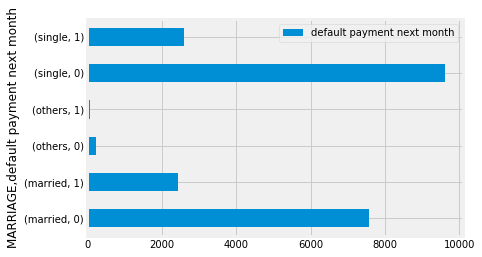

In [23]:
#look at the distribution of 'MARRIAGE' from the data
print(credit_card_default.loc[:,'MARRIAGE'].value_counts())
print('Perecentage of married defaulted:', (2423/9990)*100)
print('Perecentage of single defaulted:', (2598/12219)*100)
print('Percentage of others defaulted:', (67/291)*100)
cd_marriage = credit_card_default.groupby(['MARRIAGE', 'default payment next month']).agg({'default payment next month': 'count'})
print(cd_marriage)
cd_marriage.plot(kind='barh')

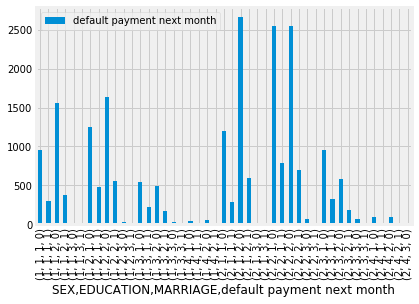

In [20]:
#graph visual by sex, marriage, education and default payment next month
cd = credit_card_default.groupby(['SEX', 'EDUCATION', 'MARRIAGE','default payment next month']).agg({'default payment next month':'count'})
cd.plot(kind='bar');

In [21]:
cd.columns = ['default']
cd = cd.reset_index()
cd.sort_values(by=['default payment next month', 'default'], ascending = False)
#majority of the population is female,graduate, single (2661). The highest combination defaulted is female, university, married (791). However not the best representation because the data is a bit skewed
# towards females, unveristy, and single 

,SEX,EDUCATION,MARRIAGE,default payment next month,default
29,2,2,1,1,791
31,2,2,2,1,703
25,2,1,2,1,598
9,1,2,2,1,559
7,1,2,1,1,480
3,1,1,2,1,376
35,2,3,1,1,326
1,1,1,1,1,304
23,2,1,1,1,286
13,1,3,1,1,227


In [22]:
print(credit_card_default.loc[:,'SEX'].value_counts())
print('Percentage of female university,graduate:', 791/13729)
print('Percentage of male university,graduate:', 1249/8771)
#There is a higher percentage of males that default in comparision with female with the same martial status and education

2    13729
1     8771
Name: SEX, dtype: int64
Percentage of female university,graduate: 0.05761526695316483
Percentage of male university,graduate: 0.1424010945160187


In [27]:
credit_card_default.loc[credit_card_default.loc[:,'Credit_Util_Pay_Status_Avg'] > 8,:]
credit_card_default.iloc[2916,:]

LIMIT_BAL                          20000
SEX                                 male
EDUCATION                     highschool
MARRIAGE                          single
AGE                                   26
PAY_0                                  8
PAY_2                                  7
PAY_3                                  6
PAY_4                                  5
PAY_5                                  4
PAY_6                                  3
BILL_AMT1                          43340
BILL_AMT2                          42619
BILL_AMT3                          35381
BILL_AMT4                          31539
BILL_AMT5                          27409
BILL_AMT6                          23567
PAY_AMT1                               0
PAY_AMT2                               0
PAY_AMT3                               0
PAY_AMT4                               0
PAY_AMT5                               0
PAY_AMT6                             300
default payment next month             0
Credit_Util_Rate

In [28]:
#Having the best utilization rate < .3 is good according to article and looking at it by SEX. Could look at it by MARRIAGE, and EDUCATION 
good_rate = credit_card_default.loc[credit_card_default.loc[:,'Credit_Util_Avg'] <= .3,:]
print(good_rate.loc[:,'SEX'].value_counts())
print('female good rate defaulted:', (1329/7671))
print('male good rate defaulted:', (858/4292))
good_rate.groupby(['SEX','default payment next month']).agg({'default payment next month': 'count'})

female    7671
male      4292
Name: SEX, dtype: int64
female good rate defaulted: 0.1732499022291748
male good rate defaulted: 0.1999068033550792


default payment next month
SEX    default payment next month                            
female 0                                                 6342
       1                                                 1329
male   0                                                 3434
       1                                                  858

In [29]:
#If <0 which is good, >0 is bad. Could look at it by MARRIAGE, and EDUCATION 
good_overall_rate = credit_card_default.loc[credit_card_default.loc[:,'Credit_Util_Pay_Status_Avg'] <= 0,:]
print(good_rate.loc[:,'SEX'].value_counts())
print('female overall good rate defaulted:', (1197/7671))
print('male overall good rate defaulted:', (873/4292))
good_overall_rate.groupby(['SEX','default payment next month']).agg({'default payment next month': 'count'})

female    7671
male      4292
Name: SEX, dtype: int64
female overall good rate defaulted: 0.15604223699648026
male overall good rate defaulted: 0.20340167753960858


default payment next month
SEX    default payment next month                            
female 0                                                 7871
       1                                                 1179
male   0                                                 4796
       1                                                  873

In [30]:
#Information on the highest average Credit Utilization Rate and Credit Utilization Rate combining Payment Status
#Even though this person has the highest credit utilization rate which is generally an indication of bad use of credit. This person is paying timely thus combining Payment Status is a good indication
credit_card_default.iloc[3796,:]

LIMIT_BAL                          20000
SEX                               female
EDUCATION                     university
MARRIAGE                          single
AGE                                   32
PAY_0                                  0
PAY_2                                  0
PAY_3                                  0
PAY_4                                  0
PAY_5                                  0
PAY_6                                  0
BILL_AMT1                         129106
BILL_AMT2                         127610
BILL_AMT3                         107828
BILL_AMT4                         102937
BILL_AMT5                          98525
BILL_AMT6                          77711
PAY_AMT1                            4420
PAY_AMT2                            3650
PAY_AMT3                            3120
PAY_AMT4                            3200
PAY_AMT5                            2900
PAY_AMT6                            2000
default payment next month             0
Credit_Util_Rate

0.7856
0.7909333333333334
0    0.768
1    0.232
Name: default payment next month, dtype: float64


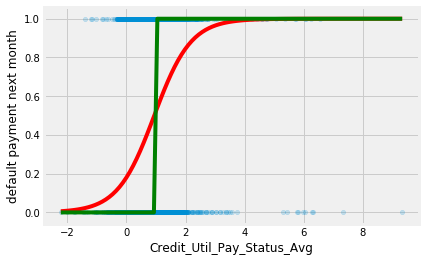

In [32]:
#Looking at how well Credit_Util_Pay_Status_Avg is doing 
feature_cols = ['Credit_Util_Pay_Status_Avg']
target_col = 'default payment next month'

X = credit_card_default.loc[:, feature_cols]
y= credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))
print(y_test.value_counts(normalize=True))
y_pred_prob = lr.predict_proba(X_test)

x_grid = np.linspace(start=credit_card_default.loc[:, 'Credit_Util_Pay_Status_Avg'].min(), 
                     stop=credit_card_default.loc[:, 'Credit_Util_Pay_Status_Avg'].max(), num=100)
pred_probs = lr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr.predict(x_grid.reshape(-1, 1))
ax = credit_card_default.plot(kind='scatter', x='Credit_Util_Pay_Status_Avg', y='default payment next month', alpha=.2)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

#underfitting, high bias/low variance

0.7859555555555555
0.7692444444444444
0    0.786133
1    0.213867
Name: default payment next month, dtype: float64


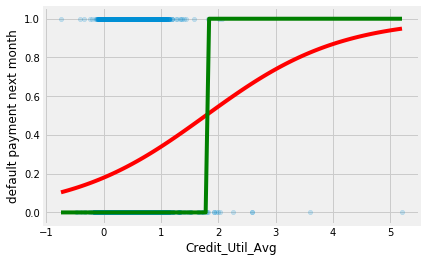

In [33]:
#Looking at how well 'Credit_Util_Avg' is doing 
feature_cols = ['Credit_Util_Avg']
target_col = 'default payment next month'

X = credit_card_default.loc[:, feature_cols]
y= credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))
print(y_test.value_counts(normalize=True))
y_pred_prob = lr.predict_proba(X_test)

x_grid = np.linspace(start=credit_card_default.loc[:, 'Credit_Util_Avg'].min(), 
                     stop=credit_card_default.loc[:, 'Credit_Util_Avg'].max(), num=100)
pred_probs = lr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr.predict(x_grid.reshape(-1, 1))
ax = credit_card_default.plot(kind='scatter', x='Credit_Util_Avg', y='default payment next month', alpha=.2)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

$\blacksquare$ Logistic Regression

In [23]:
credit_card_default['SEX'] = credit_card_default['SEX'].replace({'male':1,'female':2})
credit_card_default['MARRIAGE'] = credit_card_default['MARRIAGE'].replace({'married':1,'single':2, 'others':3})
credit_card_default['EDUCATION'] = credit_card_default['EDUCATION'].replace({'graduate school':1,'university':2, 'highschool':3,'others':4})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [172]:
#Setting target column 
target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Credit_Util_Avg']
 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

In [173]:
#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [174]:
#First Pass = Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
#Score the accuracy score for test and train data. 
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))
#Currently the model is not overfitting or underfitting. There is low variance but high bias, meaning that there can be a better model than logistic regression

0.7722666666666667
0.7744


In [176]:
y.value_counts(normalize=True)
#not much better than saying yes everytime, definitely a bias problem

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

In [177]:
y_pred = lr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[4344,    0],
       [1281,    0]])

In [178]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.04400353, 0.21092419, 0.08453606, ..., 0.08223236, 0.34479853,
       0.28739112])

In [179]:
y_pred_low_thresh = y_pred_prob > .3
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[2655, 1689],
       [ 589,  692]])

In [180]:
#Calculating precision, recall, F_1, F_2, and F_{1/2} for our admission model at different thresholds
#Higher the beta, the more I care about recall 
from sklearn import metrics 

for threshold in np.linspace(y_pred_prob.min(), y_pred_prob.max(), 4):
    y_pred_thresh = y_pred_prob > threshold
    print('threshold')
    print('precision:', metrics.precision_score(y_test, y_pred_thresh))
    print('recall:', metrics.recall_score(y_test, y_pred_thresh))
    print('f1:', metrics.f1_score(y_test, y_pred_thresh))
    print('f2:', metrics.fbeta_score(y_test, y_pred_thresh, 2))
    print('f1/2:', metrics.fbeta_score(y_test, y_pred_thresh, .5))
    print()

threshold
precision: 0.22777382645803698
recall: 1.0
f1: 0.3710354815351195
f2: 0.5959248232229252
f1/2: 0.26937797030744

threshold
precision: 0.24842484248424843
recall: 0.8618266978922716
f1: 0.3856768558951965
f2: 0.5769230769230769
f1/2: 0.28965734375819907

threshold
precision: 0.2915427114322142
recall: 0.5355191256830601
f1: 0.37754540451293345
f2: 0.4587401364183496
f1/2: 0.3207705975872066

threshold
precision: 0.0
recall: 0.0
f1: 0.0
f2: 0.0
f1/2: 0.0



/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [181]:
#identifying the best score and threshold for F2
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh,beta=2)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print(best_score, best_threshold)

0.5970432145564821 0.0524390327046559


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [182]:
#Calculate the confusion matrix for the best threshold for f2
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)

array([[ 176, 4168],
       [  21, 1260]])

In [183]:
#Calculate the test-set accuracy, precision, recall and F2 score for model 
print('accuracy score:', metrics.accuracy_score(y_test, y_pred_thresh))
print('precision score:', metrics.precision_score(y_test, y_pred_thresh))
print('recall score:', metrics.recall_score(y_test, y_pred_thresh))
print('f2 score:', metrics.fbeta_score(y_test, y_pred_thresh,beta=2))

accuracy score: 0.2552888888888889
precision score: 0.23212969786293294
recall score: 0.9836065573770492
f2 score: 0.5970432145564821


Accuracy score can be misleading when classes are imbalanced and they do not account for the relative costs of false positives and false negatives. 
- Precision measures a model's ability to avoid false positives. 
- Recall measures a model's ability to avoid false negatives. 
- $F_\beta$ score allows you to weigh precision against recall to select best overall mdoel even when the costs of false positives and false negatives are unequal.

In [160]:
#Setting target column 
target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Credit_Util_Pay_Status_Avg']

#ECOA: feature_cols = ['LIMIT_BAL', 'EDUCATION', 'Credit_Util_Pay_Status_Avg']
                 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

In [161]:
#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [162]:
#First Pass = Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
#Score the accuracy score for test and train data. 
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))
#Currently the model is not overfitting or underfitting. There is low variance but high bias, meaning that there can be a better model than logistic regression

0.7768888888888889
0.7728592592592592


In [164]:
y.value_counts(normalize=True)
#not much better than saying yes everytime, definitely a bias problem

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

In [165]:
y_pred = lr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[4370,    0],
       [1255,    0]])

In [166]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.41663725, 0.30835442, 0.30835442, ..., 0.38432503, 0.30835442,
       0.15670308])

In [167]:
y_pred_low_thresh = y_pred_prob > .3
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[2490, 1880],
       [ 495,  760]])

In [168]:
#Calculating precision, recall, F_1, F_2, and F_{1/2} for our admission model at different thresholds
#Higher the beta, the more I care about recall 
from sklearn import metrics 

for threshold in np.linspace(y_pred_prob.min(), y_pred_prob.max(), 4):
    y_pred_thresh = y_pred_prob > threshold
    print('threshold')
    print('precision:', metrics.precision_score(y_test, y_pred_thresh))
    print('recall:', metrics.recall_score(y_test, y_pred_thresh))
    print('f1:', metrics.f1_score(y_test, y_pred_thresh))
    print('f2:', metrics.fbeta_score(y_test, y_pred_thresh, 2))
    print('f1/2:', metrics.fbeta_score(y_test, y_pred_thresh, .5))
    print()

threshold
precision: 0.22315078236130867
recall: 1.0
f1: 0.3648786160779183
f2: 0.5895340097707629
f1/2: 0.26419940213043663

threshold
precision: 0.24936621341322884
recall: 0.8621513944223107
f1: 0.38684304612084375
f2: 0.5780532108131211
f1/2: 0.29068830261673206

threshold
precision: 0.2911846828879138
recall: 0.5816733067729084
f1: 0.38809144072301965
f2: 0.4849209512421948
f1/2: 0.3234955242400071

threshold
precision: 0.0
recall: 0.0
f1: 0.0
f2: 0.0
f1/2: 0.0



/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [169]:
#identifying the best score and threshold for F2
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh,beta=2)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print(best_score, best_threshold)

0.5920107289970304 0.04324532164202757


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [170]:
#Calculate the confusion matrix for the best threshold for f2
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)

array([[ 187, 4183],
       [  19, 1236]])

In [171]:
#Calculate the test-set accuracy, precision, recall and F2 score for model 
print('accuracy score:', metrics.accuracy_score(y_test, y_pred_thresh))
print('precision score:', metrics.precision_score(y_test, y_pred_thresh))
print('recall score:', metrics.recall_score(y_test, y_pred_thresh))
print('f2 score:', metrics.fbeta_score(y_test, y_pred_thresh,beta=2))

accuracy score: 0.2529777777777778
precision score: 0.2280863627975641
recall score: 0.9848605577689243
f2 score: 0.5920107289970304


In [1]:
#predictions of X_test and compare it to y_test
#list(zip(lr.predict(X_test), y_test))

$\blacksquare$ Decision Tree Classifier

In [47]:
target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Credit_Util_Avg']
                 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))
#Overfitting. The training data set is doing a lot better than test data set. 

0.8192
0.8209777777777778


In [48]:
y.value_counts(normalize=True) #model is doing worse

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

In [49]:
y_pred = dtc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[4145,  234],
       [ 773,  473]])

In [50]:
y_pred_prob = dtc.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.19897959, 0.17824074, 0.69705882, ..., 0.11183991, 0.11183991,
       0.11183991])

In [51]:
#Calculating precision, recall, F_1, F_2, and F_{1/2} for our admission model at different thresholds
#Higher the beta, the more I care about recall 
from sklearn import metrics 

for threshold in np.linspace(y_pred_prob.min(), y_pred_prob.max(), 4):
    y_pred_thresh = y_pred_prob > threshold
    print('threshold')
    print('precision:', metrics.precision_score(y_test, y_pred_thresh))
    print('recall:', metrics.recall_score(y_test, y_pred_thresh))
    print('f1:', metrics.f1_score(y_test, y_pred_thresh))
    print('f2:', metrics.fbeta_score(y_test, y_pred_thresh, 2))
    print('f1/2:', metrics.fbeta_score(y_test, y_pred_thresh, .5))
    print()

threshold
precision: 0.22123421661035034
recall: 0.9983948635634029
f1: 0.362207017033047
f2: 0.5864052041104931
f1/2: 0.262027129497009

threshold
precision: 0.5448449287510477
recall: 0.521669341894061
f1: 0.5330053300533005
f2: 0.5261453780152178
f1/2: 0.5400465270854103

threshold
precision: 0.72265625
recall: 0.14847512038523275
f1: 0.24633821571238346
f2: 0.1765267175572519
f1/2: 0.407488986784141

threshold
precision: 0.0
recall: 0.0
f1: 0.0
f2: 0.0
f1/2: 0.0



/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
#identifying the best score and threshold for F2
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh,beta=2)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print(best_score, best_threshold)

0.6005031779661016 0.11183991106170095


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
#Calculate the confusion matrix for the best threshold for f2
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)

array([[   5, 4355],
       [   3, 1262]])

In [33]:
#Calculate the test-set accuracy, precision, recall and F2 score for model 
print('accuracy score:', metrics.accuracy_score(y_test, y_pred_thresh))
print('precision score:', metrics.precision_score(y_test, y_pred_thresh))
print('recall score:', metrics.recall_score(y_test, y_pred_thresh))
print('f2 score:', metrics.fbeta_score(y_test, y_pred_thresh,beta=2))

accuracy score: 0.22524444444444444
precision score: 0.22467509346626313
recall score: 0.9976284584980237
f2 score: 0.5909899784583684


$\blacksquare$ Tuning a Decision Tree

In [ ]:
# Try different values one by one.
from sklearn.model_selection import cross_val_score, KFold

target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Credit_Util_Avg']
                 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

kf = KFold(n_splits=len(X), shuffle=True) #using every row once because 14 rows

dtc = DecisionTreeClassifier(max_depth=1, random_state=1)
scores = cross_val_score(dtc, X, y, cv=kf, scoring='neg_mean_squared_error') #cross_val_score uses neg mean squared error
mse= -np.array(scores).mean() #turn mean squared error back to positive because scoring can not be positive unforunately
print(mse)
rmse=np.sqrt(mse)
rmse

In [ ]:
# Use a loop to try a range of values
max_depth_range = range(1, 8)

rmse_scores = []

for depth in max_depth_range:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=1)
    neg_mse_scores = cross_val_score(dtc, X, y, cv=kf, scoring='neg_mean_squared_error')
    mse_scores = -np.array(neg_mse_scores)
    mse_ave_score = mse_scores.mean()
    rmse_ave_score = np.sqrt(mse_ave_score)
    rmse_scores.append(rmse_ave_score)

rmse_scores

In [ ]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
fig, ax = plt.subplots()
ax.plot(max_depth_range, rmse_scores)
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSE (lower is better)');

In [ ]:
# max_depth=4 was best, so fit a tree using that parameter.
dtc = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc.fit(X,y)

$\blacksquare$ Finding the best max depth = 5 using cross-validation

In [ ]:
max_depth_range = range(1,21)
from sklearn.model_selection import cross_val_score, KFold

scores = []

kf = KFold(n_splits=10, shuffle=True)

for depth in max_depth_range:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=1)
    scores.append(cross_val_score(dtc, X, y, cv=kf).mean())
    
scores

In [ ]:
fig, ax = plt.subplots()
ax.plot(max_depth_range, scores)
ax.set_xlabel('max_depth')
ax.set_ylabel('R^2 (higher is better)');

In [ ]:
sorted(zip(scores, max_depth_range))[::-1]

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=1)
dtc.fit(X,y)

In [ ]:
sorted(zip(dtc.feature_importances_, feature_cols))[::-1]

$\blacksquare$ Random Forest Classifier

In [55]:
target_col = 'default payment next month'
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Credit_Util_Avg']
                 
X = credit_card_default.loc[:, feature_cols]
y = credit_card_default.loc[:, target_col]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, oob_score=True, max_depth=5) 

rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8210962962962963
0.8136888888888889


In [56]:
y.value_counts(normalize=True)

0    0.773867
1    0.226133
Name: default payment next month, dtype: float64

In [57]:
y_pred = rfc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[4102,  219],
       [ 829,  475]])

In [58]:
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.15610711, 0.6198673 , 0.11905841, ..., 0.54935705, 0.14885283,
       0.14683615])

In [59]:
y_pred_low_thresh = y_pred_prob > .3
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[3801,  520],
       [ 660,  644]])

In [60]:
#Calculating precision, recall, F_1, F_2, and F_{1/2} for our admission model at different thresholds
#Higher the beta, the more I care about recall 
from sklearn import metrics 

for threshold in np.linspace(y_pred_prob.min(), y_pred_prob.max(), 4):
    y_pred_thresh = y_pred_prob > threshold
    print('threshold')
    print('precision:', metrics.precision_score(y_test, y_pred_thresh))
    print('recall:', metrics.recall_score(y_test, y_pred_thresh))
    print('f1:', metrics.f1_score(y_test, y_pred_thresh))
    print('f2:', metrics.fbeta_score(y_test, y_pred_thresh, 2))
    print('f1/2:', metrics.fbeta_score(y_test, y_pred_thresh, .5))
    print()

threshold
precision: 0.23186344238975817
recall: 1.0
f1: 0.37644341801385683
f2: 0.6014760147601476
f1/2: 0.27394957983193274

threshold
precision: 0.5754189944134078
recall: 0.47392638036809814
f1: 0.5197645079899075
f2: 0.4912559618441971
f1/2: 0.5517857142857142

threshold
precision: 0.7166324435318275
recall: 0.26763803680981596
f1: 0.3897264098269123
f2: 0.30597930913554267
f1/2: 0.5365928659286592

threshold
precision: 0.0
recall: 0.0
f1: 0.0
f2: 0.0
f1/2: 0.0



/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
#identifying the best score and threshold for F2
from sklearn import metrics

best_score = -1
best_threshold = -1

for threshold in sorted(y_pred_prob):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh,beta=1.5)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print(best_score, best_threshold)

0.5617137648131266 0.15401296072153636


/Users/AnnaHuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
#Calculate the confusion matrix for the best threshold for f2
y_pred_thresh = y_pred_prob > best_threshold
metrics.confusion_matrix(y_test, y_pred_thresh)

array([[2718, 1603],
       [ 356,  948]])

In [63]:
#Calculate the test-set accuracy, precision, recall and F2 score for model 
print('accuracy score:', metrics.accuracy_score(y_test, y_pred_thresh))
print('precision score:', metrics.precision_score(y_test, y_pred_thresh))
print('recall score:', metrics.recall_score(y_test, y_pred_thresh))
print('f1 score:', metrics.fbeta_score(y_test, y_pred_thresh,beta=1.5))

accuracy score: 0.6517333333333334
precision score: 0.3716189729517836
recall score: 0.7269938650306749
f1 score: 0.5617137648131266


In [70]:
rfc.score(X,y)

0.8192444444444444

In [69]:
from sklearn.model_selection import cross_val_score, KFold

In [65]:
kf = KFold(n_splits=10, shuffle=True)

In [66]:
scores = cross_val_score(estimator=rfc, X=X, y=y, cv=kf)

In [67]:
scores

array([0.80666667, 0.82444444, 0.80311111, 0.81733333, 0.81866667,
       0.81955556, 0.81866667, 0.82222222, 0.82666667, 0.804     ])

In [68]:
scores.mean()

0.8161333333333334

$\blacksquare$ Identifying feature importances

In [ ]:
rfc = RandomForestClassifier(n_estimators=150, oob_score=True, random_state=1)
rfc.fit(X,y)

In [ ]:
sorted(zip(rfc.feature_importances_, feature_cols))[::-1]

In [ ]:
rfc.oob_score_ 

$\blacksquare$ Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcla = RandomForestClassifier()
rfcla

$\blacksquare$ Tuning n_estimators

In [ ]:
# List of values to try for n_estimators:
estimator_range = list(range(10, 310, 10))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    rfcla = RandomForestClassifier(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfcla, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).

fig, ax = plt.subplots()
ax.plot(estimator_range, RMSE_scores);
ax.set_xlabel('n_estimators');
ax.set_ylabel('RMSE (lower is better)');

$\blacksquare$ Tuning max_features

In [ ]:
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfcla = RandomForestClassifier(n_estimators=150, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
# Plot max_features (x-axis) versus RMSE (y-axis).
fig, ax = plt.subplots()
ax.plot(feature_range, RMSE_scores);
ax.set_xlabel('max_features');
ax.set_ylabel('RMSE (lower is better)');

In [ ]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

# Clearly identify...

#### Shortcomings of your data
 - Data may not have all the features necessary to predict the default payment next month. Instead, it is already provided a set of variables to work off of. 

#### Any assumptions that you will need to make in light of those shortcomings

- Assuming that no other variables will be a better prediction of the default payment next month other than the variables provided

#### At least five things you might try as ways to improve your model

- Better feature engineering, pay, bill amount and pay amount work together and not separately 
- Better model 
- Identify correlation vs causation
- Addressing the threshold
- Understand the data a little more 

#### What you think is the most appropriate metric for evaluating the models you will build. 

- Recall metric is a good evaluation of the model because I want to predict the percentage of total relevant results correctly classified by the model.